In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy 

/opt/anaconda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#TODO: we are getting some duplicates in this file that we need to check into
#problem is likely caused by duplicates in veracity labels, which need to be fixed anyways 

In [4]:
#set paths 
STORMS_PATH  = "/shared/3/projects/newsDiffusion/data/processed/stormDfs/20000_90_storms.tsv"
ARTICLES_PATH = "/shared/3/projects/newsDiffusion/data/processed/fullDataWith20000.tsv"
POLITICS_PATH = "/shared/3/projects/newsDiffusion/data/raw/NELAdata/CSVs/politics.csv"
VER_2020 = "/shared/3/projects/newsDiffusion/data/raw/NELA-gt-2020/labels.csv"
VER_2021 = "/shared/3/projects/newsDiffusion/data/raw/NELA-gt-2021/labels_all.tab"

#read data
ver2020 = pd.read_csv(VER_2020)
ver2021 = pd.read_csv(VER_2021, sep="\t")
politics = pd.read_csv(POLITICS_PATH)
stormsDf = pd.read_csv(STORMS_PATH, sep="\t")
artDf = pd.read_csv(ARTICLES_PATH, sep="\t")

artDf["date"] = pd.to_datetime(artDf["date"])

F_COLOR = "#fdae61"
S_COLOR = "#abdda4"

<ipython-input-4-a508520d3801>:13: DtypeWarning: Columns (4,5,12,13,15,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  artDf = pd.read_csv(ARTICLES_PATH, sep="\t")


In [5]:
forLen = artDf[artDf["date"] >= "04-01-2020"]

In [6]:
forLen.shape

(4228898, 50)

In [7]:
forLen

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,key,local_id,sourcedomain_id,date,title,content,url,...,national,id,author,published,published_utc,collection_utc,20000_80,20000_85,20000_90,year
338570,338570,1698421,1698421,1698421,NaN,NaN,2020-04-01,Trump says Iran is planning &apos;sneak attack...,Donald Trump claimed on Wednesday that Iran is...,https://www.independent.co.uk/news/world/ameri...,...,True,theindependent--2020-04-01--Trump says Iran is...,Richard Hall,"Wed, 01 Apr 2020 17:16:00 GMT",1.585776e+09,1.585786e+09,20158.0,22082.0,77740.0,2020
338571,338571,1698422,1698422,1698422,NaN,NaN,2020-04-01,Coronavirus: Banks urged to cancel debt intere...,Banks are facing calls to suspend interest pay...,https://www.independent.co.uk/news/business/ne...,...,True,theindependent--2020-04-01--Coronavirus: Banks...,NaN,"Wed, 01 Apr 2020 16:25:23 GMT",1.585773e+09,1.585786e+09,NaN,NaN,NaN,2020
338572,338572,1698413,1698413,1698413,NaN,NaN,2020-04-01,Help the Hungry: Charities working hard to get...,Several tons of food is flooding into a networ...,https://www.independent.co.uk/news/uk/home-new...,...,True,theindependent--2020-04-01--Help the Hungry: C...,Adam Forrest,"Wed, 01 Apr 2020 15:58:00 GMT",1.585771e+09,1.585786e+09,NaN,NaN,NaN,2020
338573,338573,1633176,1633176,1633176,NaN,NaN,2020-04-01,The UK Missed Out On Thousands Of Extra Corona...,An “ appalling ” breakdown in communication be...,https://www.buzzfeed.com/richholmes/uk-thousan...,...,True,buzzfeed--2020-04-01--The UK Missed Out On Tho...,NaN,2020-04-01T19:34:59.000Z,1.585770e+09,1.593261e+09,NaN,NaN,NaN,2020
338574,338574,3164666,3164666,3164666,NaN,NaN,2020-04-01,Shin-Soo Choo donating $1K to each Texas Range...,April 1 ( UPI ) -- Texas Rangers outfielder Sh...,https://www.upi.com/Sports_News/MLB/2020/04/01...,...,True,upi--2020-04-01--Shin-Soo Choo donating $1K to...,NaN,"Wed, 01 Apr 2020 21:53:10 -0400",1.585792e+09,1.585830e+09,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567463,4567463,3804678,3804678,3804678,NaN,NaN,2021-12-31,Reports: Colorado Wildfires Are Most Destructi...,Colorado ’ s wildfires are shaping up to be th...,https://www.breitbart.com/weather/2021/12/31/r...,...,True,breitbart--2021-12-31--Reports: Colorado Wildf...,Nick Gilbertson,"Fri, 31 Dec 2021 20:39:10 +0000",1.641001e+09,1.641035e+09,30726.0,32576.0,NaN,2021
4567464,4567464,3804677,3804677,3804677,NaN,NaN,2021-12-31,"Police: Disabled Man, Caregivers Zip-Tied amid...","A disabled man , his child , and the people ca...",https://www.breitbart.com/crime/2021/12/31/pol...,...,True,"breitbart--2021-12-31--Police: Disabled Man, C...",Amy Furr,"Fri, 31 Dec 2021 20:13:02 +0000",1.641000e+09,1.641035e+09,NaN,NaN,NaN,2021
4567465,4567465,3804676,3804676,3804676,NaN,NaN,2021-12-31,"Joe Biden, with Help from GOP, Resettles Over ...",President Joe Biden has resettled more than 52...,https://www.breitbart.com/podcast/2021/12/31/j...,...,True,"breitbart--2021-12-31--Joe Biden, with Help fr...",John Binder,"Fri, 31 Dec 2021 22:49:54 +0000",1.641009e+09,1.641035e+09,NaN,NaN,NaN,2021
4567466,4567466,3925800,3925800,3925800,NaN,NaN,2021-12-31,Ghislaine Maxwell’s Conviction Is Welcome But ...,Ghislaine Maxwell ’ s Conviction Is Welcome Bu...,https://thewashingtonstandard.com/ghislaine-ma...,...,True,thewashingtonstandard--2021-12-31--Ghislaine M...,Matt Agorist,"Fri, 31 Dec 2021 14:53:13 +0000",1.640980e+09,1.640997e+09,14580.0,22074.0,19706.0,2021


In [8]:
len(stormsDf)

20331

In [9]:
len(forLen["source"].unique())

815

In [11]:
#merged.head()

In [12]:
SCOL = "20000_90"

In [13]:
#fill in the clusters of size 1 that have no cluster label 
clustList = list(artDf[SCOL])
clustNum = np.nanmax(clustList) + 1

for i, num in enumerate(clustList): 
    currClust = num
    if num != num: 
        clustList[i] = clustNum 
        clustNum += 1
    

artDf[SCOL] = clustList
artDf[SCOL] = artDf[SCOL].astype(int)

In [14]:
print(f'{len(artDf.dropna(subset=[SCOL])) / len(artDf)}% of articles are clustered') 

1.0% of articles are clustered


In [15]:
len(artDf)

4567468

In [16]:
forLen = artDf[artDf["date"] >= "04-01-2020"]

In [17]:
len(forLen[SCOL].unique())

3262495

In [18]:
len(artDf.loc[artDf[artDf["date"] >= "04-01-2020"], SCOL].unique())

ValueError: Cannot index with multidimensional key

In [ ]:
"""
sanity check - takes a while 
print(len(artDf) - len(artDf.dropna(subset=[SCOL])))

print(np.nanmax(artDf[SCOL]) - max(clustList))
"""

In [20]:
def storyLen(inList): 
    return ((max(inList) - min(inList)) / np.timedelta64(1,"D")) + 1

#get features of each cluster
test = artDf[[SCOL, "date"]].groupby(SCOL).agg(list)
test["nArts"] = test["date"].apply(len)
test["storyLen"] = test["date"].apply(storyLen)
test = test.reset_index().drop(columns=["date"])

In [21]:
#clean up dframes 
artDf = artDf.drop(columns=["Unnamed: 0"])
stormsDf = stormsDf.drop(columns=["Unnamed: 0", SCOL])

artDf["date"] = pd.to_datetime(artDf["date"])

In [22]:
#fill na in 2021 with 2020 ratings 
sourceDf = pd.merge(ver2020, ver2021[["source","label"]], on="source", how="outer")
sourceDf["label"] = sourceDf["label_y"].fillna(sourceDf["label_x"])

#get local/national labels 
localNat = artDf[["source", "national"]].drop_duplicates()
sourceDf = pd.merge(sourceDf, localNat, on="source", how="outer")

#we want outlets with both local and national classification to be local 
sourceDf = sourceDf.sort_values("national").drop_duplicates(subset=["source"])

sourceDf.loc[(sourceDf["source"] == "charlotteobserver"), ["national"]] = False

In [23]:
#only item with a -1 reliability that matters/is relevant is forbes... 
#should be rated "reliable"
sourceDf.loc[sourceDf["source"] == "forbes", "label"] = 0

#if we have nat/local duplicates, call them local 
sourceDf = sourceDf.sort_values("national").drop_duplicates(subset=["source"])

In [24]:
sourceDf = sourceDf.rename(columns={"label":"verLab"})

In [25]:
#verify that we have NO duplicated rows in sourceDf: sum(sourceDf["source"].duplicated())
#no dupes here either : sum(politics["fips"].duplicated())

In [26]:
#perform the necessary merging 
merged = pd.merge(artDf.drop(columns=["national"]), sourceDf[["source", "verLab", "national"]], on="source", how="left")

merged = pd.merge(merged, politics, on="fips", how="left")

merged = pd.merge(merged, stormsDf, on="key", how="left")


In [27]:
merged[SCOL + "_storm"] = merged[SCOL + "_storm"].fillna(False)

In [28]:
#only include articles after april 1, 2020
merged = merged[merged["date"] >= "04-01-2020"]

In [29]:
merged.shape

(4228898, 57)

In [30]:
#merge in article size and duration things 
merged = pd.merge(merged, test[[SCOL, "nArts","storyLen"]], on=SCOL)

In [31]:
#Exploratory question 1: who participates in media storms 
stormRows = merged.loc[merged[SCOL + "_storm"] == True, ["source", SCOL, "verLab", "national", "logodds_Trump20", "total_population", "white_pct", "date"]]
nonStormRows = merged.loc[merged[SCOL + "_storm"] == False, ["source", SCOL, "verLab", "national", "logodds_Trump20", "total_population", "white_pct", "date"]]

In [32]:
#get percentage of difference veracity labels 
#check if there are veracity labels for local outelts? 

stormVers = pd.DataFrame(stormRows["verLab"].value_counts()).reset_index().rename(columns={"count":"stormCount"})
nonStormVers = pd.DataFrame(nonStormRows["verLab"].value_counts()).reset_index().rename(columns={"count":"stormCount"})

In [33]:
stormVers["normed"] = stormVers["stormCount"] / sum(stormVers["stormCount"])
#stormVers.columns = [name + "Storm" for name in stormVers.columns]
stormVers["storm"] = True 

nonStormVers["normed"] = nonStormVers["stormCount"] / sum(nonStormVers["stormCount"])
#nonStormVers.columns = [name + "NonStorm" for name in nonStormVers.columns]
nonStormVers["storm"] = False

In [34]:
#use as a comparison 
compRows = merged.loc[(merged["nArts"] >= 50) & (merged["storyLen"] > 5) & (merged["storyLen"] <= 53) & (merged[SCOL + "_storm"] == False), \
                     ["date", "source", SCOL, "national"]]

In [35]:
def mode(inList):
    return scipy.stats.mode(inList)[0][0]

In [36]:
#first get some summary statistics for the storms
sCounts = pd.DataFrame(stormRows.value_counts(SCOL)).reset_index()

In [37]:
#number of stories in a storm seems about right 
print(f'min, max storm size {min(sCounts["count"])}, {max(sCounts["count"])}')
print(f'mean, median, mode storm size {np.mean(sCounts["count"])}, {np.median(sCounts["count"])}, {mode(sCounts["count"])}')

min, max storm size 51, 1378
mean, median, mode storm size 207.4591836734694, 155.5, 81


claim 1: out of the data we have labels for, storm coverage appears to include slightly more reliable articles 

Text(0.5, 0, '# of Articles')

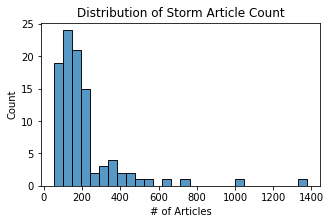

In [38]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=sCounts, x="count", ax=ax)
ax.set_title("Distribution of Storm Article Count")
ax.set_xlabel("# of Articles")

In [39]:
#first get some summary statistics for the storms
sCountsComp = pd.DataFrame(compRows.value_counts(SCOL)).reset_index()

#number of stories in a storm seems about right 
print(f'min, max storm size {min(sCountsComp["count"])}, {max(sCountsComp["count"])}')
print(f'mean, median, mode storm size {np.mean(sCountsComp["count"])}, {np.median(sCountsComp["count"])}, {mode(sCountsComp["count"])}')

min, max storm size 50, 174
mean, median, mode storm size 77.5072463768116, 71.0, 56


In [40]:
#303 other long stories 
len(sCountsComp)

276

Text(0.5, 0, '# of Articles')

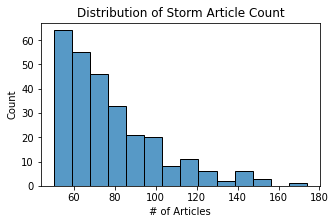

In [41]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=sCountsComp, x="count", ax=ax)
ax.set_title("Distribution of Storm Article Count")
ax.set_xlabel("# of Articles")

In [42]:
#what is the average storm length 
sDurs = pd.DataFrame(stormRows[["date", SCOL]].groupby(SCOL).agg(lambda x: ((max(x) - min(x))/np.timedelta64(1, "D"))+ 1)).reset_index()

In [43]:
#number of stories in a storm seems about right 
print(f'min, max storm duration {min(sDurs["date"])}, {max(sDurs["date"])}')
print(f'mean, median, mode storm duration {np.mean(sDurs["date"])}, {np.median(sDurs["date"])}, {mode(sDurs["date"])}')

min, max storm duration 7.0, 54.0
mean, median, mode storm duration 15.010204081632653, 11.0, 8.0


Text(0.5, 0, 'Storm Duration')

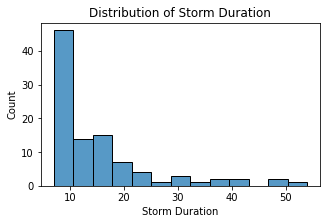

In [44]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=sDurs, x="date", ax=ax)
ax.set_title("Distribution of Storm Duration")
ax.set_xlabel("Storm Duration")

In [45]:
#its probably worth checking out these long stories.. 

#what is the average storm length 
sDursComp = pd.DataFrame(compRows[["date", SCOL]].groupby(SCOL).agg(lambda x: (max(x) - min(x))/np.timedelta64(1, "D"))).reset_index()

#number of stories in a storm seems about right 
print(f'min, max storm duration {min(sDursComp["date"])}, {max(sDursComp["date"])}')
print(f'mean, median, mode storm duration {np.mean(sDursComp["date"])}, {np.median(sDursComp["date"])}, {mode(sDursComp["date"])}')

min, max storm duration 5.0, 47.0
mean, median, mode storm duration 10.101449275362318, 8.0, 5.0


Text(0.5, 0, 'Storm Duration')

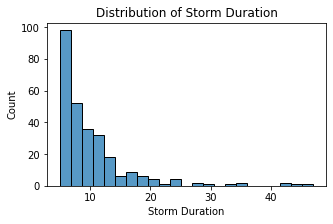

In [46]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=sDursComp, x="date", ax=ax)
ax.set_title("Distribution of Storm Duration")
ax.set_xlabel("Storm Duration")

In [47]:
#now get distribution of number of outlets 
nOuts = pd.DataFrame(stormRows[[SCOL, "source"]].groupby(SCOL).agg(lambda x: len(set(x)))).reset_index()

#number of stories in a storm seems about right 
print(f'min, max storm outlet count {min(nOuts["source"])}, {max(nOuts["source"])}')
print(f'mean, median, mode outlet count {np.mean(nOuts["source"])}, {np.median(nOuts["source"])}, {mode(nOuts["source"])}')

min, max storm outlet count 5, 200
mean, median, mode outlet count 76.12244897959184, 74.0, 86


Text(0.5, 0, '# of Outlets')

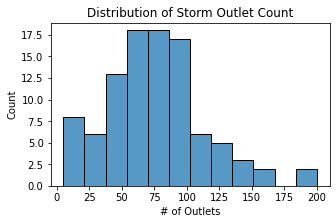

In [48]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=nOuts, x="source", ax=ax)
ax.set_title("Distribution of Storm Outlet Count")
ax.set_xlabel("# of Outlets")

In [49]:
#significantly more outlets 

In [50]:
#now get distribution of number of outlets 
nOutsComp = pd.DataFrame(compRows[[SCOL, "source"]].groupby(SCOL).agg(lambda x: len(set(x)))).reset_index()

#number of stories in a storm seems about right 
print(f'min, max storm outlet count {min(nOutsComp["source"])}, {max(nOutsComp["source"])}')
print(f'mean, median, mode outlet count {np.mean(nOutsComp["source"])}, {np.median(nOutsComp["source"])}, {mode(nOutsComp["source"])}')

min, max storm outlet count 1, 97
mean, median, mode outlet count 48.481884057971016, 49.0, 52


In [51]:
#something very paradoxical at play. clusters which have a HIGH amount of reporting for three outlets tend to have 
#more unique outlets in their coverage 

Text(0.5, 0, '# of Outlets')

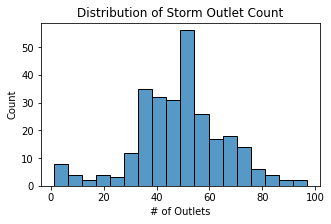

In [52]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=nOutsComp, x="source", ax=ax)
ax.set_title("Distribution of Storm Outlet Count")
ax.set_xlabel("# of Outlets")

In [53]:
#diff in means for outlet count
print(f'mean outlets - mean comp outlets = {np.mean(nOuts["source"])} - {np.mean(nOutsComp["source"])} = {np.mean(nOuts["source"]) - np.mean(nOutsComp["source"])}')

#diff in means for outlet count
print(f'mean outlets - mean comp outlets = {np.median(nOuts["source"])} - {np.median(nOutsComp["source"])} = {np.median(nOuts["source"]) - np.median(nOutsComp["source"])}')

mean outlets - mean comp outlets = 76.12244897959184 - 48.481884057971016 = 27.640564921620822
mean outlets - mean comp outlets = 74.0 - 49.0 = 25.0


In [54]:
#now check out national/local balance 
natPercents = stormRows[[SCOL, "national"]].groupby(SCOL).agg(lambda x: np.mean(x) * 100)

#number of stories in a storm seems about right 
print(f'min, max storm outlet count {min(natPercents["national"])}, {max(natPercents["national"])}')
print(f'mean, median outlet count {np.mean(natPercents["national"])}, {np.median(natPercents["national"])}')

min, max storm outlet count 0.0, 100.0
mean, median outlet count 59.07793241728487, 62.189678366148954


<Axes: ylabel='Count'>

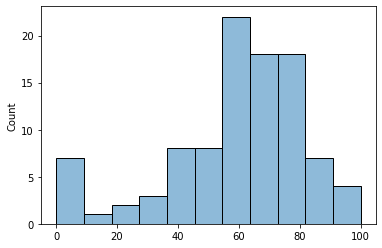

In [55]:
sns.histplot(natPercents, legend=False)

In [57]:
natPercentsComp = compRows[[SCOL, "national"]].groupby(SCOL).agg(lambda x: np.mean(x) * 100)

#number of stories in a storm seems about right 
print(f'min, max comp. nat. percentage {min(natPercentsComp)}, {max(natPercentsComp)}')
print(f'mean, median comp. nat percentage {np.mean(natPercentsComp)}, {np.median(natPercentsComp)}')

min, max comp. nat. percentage national, national
mean, median comp. nat percentage 68.88043803254303, 71.62162162162163


<Axes: xlabel='national', ylabel='Count'>

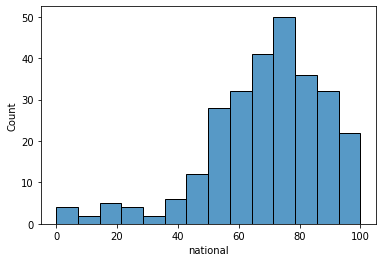

In [58]:
sns.histplot(natPercentsComp["national"])

In [59]:
#diff in means for outlet count
print(f'mean outlets - mean comp outlets = {np.mean(natPercents["national"])} - {np.mean(natPercentsComp["national"])} = {np.mean(natPercents["national"]) - np.mean(natPercentsComp["national"])}')

#diff in means for outlet count
print(f'mean outlets - mean comp outlets = {np.median(natPercents["national"])} - {np.median(natPercentsComp["national"])} = {np.median(natPercents["national"]) - np.median(natPercentsComp["national"])}')

mean outlets - mean comp outlets = 59.07793241728487 - 68.88043803254303 = -9.802505615258156
mean outlets - mean comp outlets = 62.189678366148954 - 71.62162162162163 = -9.431943255472675


In [60]:
FIG_PATH = "/home/blitt/projects/localNews/reports/figures/drafts/"
PALETTE = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f','#bf5b17','#666666']

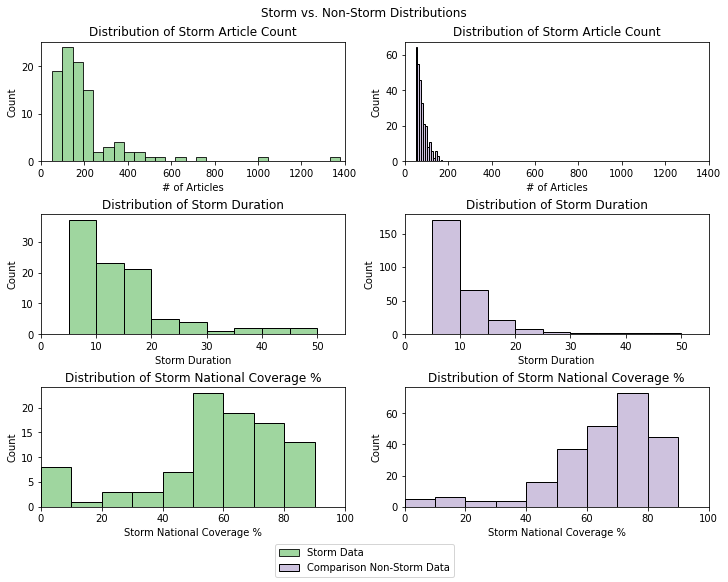

In [61]:
fig, axs = plt.subplots(3, 2, figsize=(10 , 8), layout="constrained")

#plot number of articles 
h1 = sns.histplot(data=sCounts, x="count", ax=axs[0, 0], color=PALETTE[0], label="Storm Data")
axs[0, 0].set_xlim(0, 1400)
axs[0,0].set_title("Distribution of Storm Article Count")
axs[0,0].set_xlabel("# of Articles")

sns.histplot(data=sCountsComp, x="count", ax=axs[0, 1], color=PALETTE[1], label="Comparison Non-Storm Data")
axs[0, 1].set_xlim(0, 1400)
axs[0, 1].set_title("Distribution of Storm Article Count")
axs[0, 1].set_xlabel("# of Articles")

fig.legend(loc="outside lower center")
#plot durations 
sns.histplot(data=sDurs, x="date", ax=axs[1, 0], color=PALETTE[0], bins=np.arange(0, 55, 5))
axs[1, 0].set_xlim(0, 55)
axs[1, 0].set_title("Distribution of Storm Duration")
axs[1, 0].set_xlabel("Storm Duration")

sns.histplot(data=sDursComp, x="date", ax=axs[1, 1], color=PALETTE[1], bins=np.arange(0, 55, 5))
axs[1, 1].set_xlim(0, 55)
axs[1, 1].set_title("Distribution of Storm Duration")
axs[1, 1].set_xlabel("Storm Duration")

#plot national/local coverage %'s 
sns.histplot(natPercents["national"], ax=axs[2, 0], color=PALETTE[0], bins=np.arange(0, 100, 10))
axs[2, 0].set_xlim(0, 100)
axs[2, 0].set_title("Distribution of Storm National Coverage %")
axs[2, 0].set_xlabel("Storm National Coverage %")
axs[2, 0].set_ylabel("Count")

sns.histplot(natPercentsComp["national"], ax=axs[2, 1], color=PALETTE[1], bins=np.arange(0, 100, 10))
axs[2, 1].set_xlim(0, 100)
axs[2, 1].set_title("Distribution of Storm National Coverage %")
axs[2, 1].set_xlabel("Storm National Coverage %")
axs[2, 1].set_ylabel("Count")

fig.suptitle("Storm vs. Non-Storm Distributions")
plt.savefig(FIG_PATH + "summaryHists.pdf", bbox_inches="tight")

In [62]:
tab10 = sns.color_palette("tab10")

colNames = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "yellow", "turqoise"]
colDict = dict(zip(colNames, tab10))

In [63]:
tab10

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [71]:
#bring in peak data so that we can make a figure with all four histograms for the appendix
peakDayDf = pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/newsData/peakDayDf.tsv", sep="\t")

In [ ]:
peakDayDf

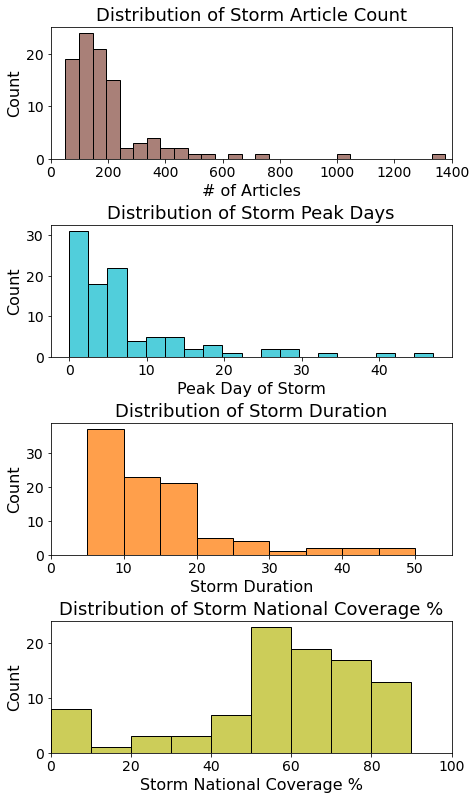

In [78]:
#new version 
fig, axs = plt.subplots(4, 1, figsize=(6.5 , 11), layout="constrained")

#plot number of articles 
h1 = sns.histplot(data=sCounts, x="count", ax=axs[0], color=colDict["brown"], label="Storm Data")
axs[0].set_xlim(0, 1400)
axs[0].set_title("Distribution of Storm Article Count", size=18)
axs[0].set_xlabel("# of Articles", size=16)
axs[0].set_ylabel("Count", size=16)

#fig.legend(loc="outside lower center")
#plot durations 

sns.histplot(data=peakDayDf, x="peakDayInt", ax=axs[1], color=colDict["turqoise"])
axs[1].set_title("Distribution of Storm Peak Days", fontsize=18)
#axs[1].set_xlim(0, 55)
#axs[2].set_title("Distribution of Storm Duration", size=18)
axs[1].set_xlabel("Peak Day of Storm", fontsize=16)
axs[1].set_ylabel("Count", size=16)

#fig.legend(loc="outside lower center")
#plot durations 
sns.histplot(data=sDurs, x="date", ax=axs[2], color=colDict["orange"], bins=np.arange(0, 55, 5))
axs[2].set_xlim(0, 55)
axs[2].set_title("Distribution of Storm Duration", size=18)
axs[2].set_xlabel("Storm Duration", size=16)
axs[2].set_ylabel("Count", size=16)

#plot national/local coverage %'s 
sns.histplot(natPercents["national"], ax=axs[3], color=colDict["yellow"], bins=np.arange(0, 100, 10))
axs[3].set_xlim(0, 100)
axs[3].set_title("Distribution of Storm National Coverage %", size=18)
axs[3].set_xlabel("Storm National Coverage %", size=16)
axs[3].set_ylabel("Count", size=16) 

axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[2].tick_params(axis='both', which='major', labelsize=14)
axs[3].tick_params(axis='both', which='major', labelsize=14)

#fig.suptitle("Storm Distributions of Media Storm")
plt.savefig(FIG_PATH + "summaryHists.pdf", bbox_inches="tight")

In [67]:
FIG_PATH + "summaryHists.pdf"

'/home/blitt/projects/localNews/reports/figures/drafts/summaryHists.pdf'

In [961]:
plt.figlegend(lines, labels, loc = 'lower center', ncol=5, labelspacing=0.)

NameError: name 'lines' is not defined

In [ ]:
#if time, add in entropy of veracity 

Text(0.5, 1.0, 'Veracity: Storms Versus Non-Storms')

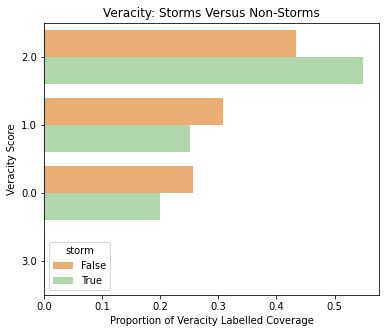

In [47]:
fig, ax = plt.subplots(figsize=(6, 5))
verProps = pd.concat([stormVers, nonStormVers], axis=0)
verProps["verLab"] = (2 - verProps["verLab"]).astype(str) 
sns.barplot(x="normed", y="verLab", hue="storm", data=verProps, palette=[F_COLOR, S_COLOR])

ax.set_xlabel("Proportion of Veracity Labelled Coverage")
ax.set_ylabel("Veracity Score")

ax.set_title("Veracity: Storms Versus Non-Storms")

<Axes: xlabel='logodds_Trump20', ylabel='20000_90_storm'>

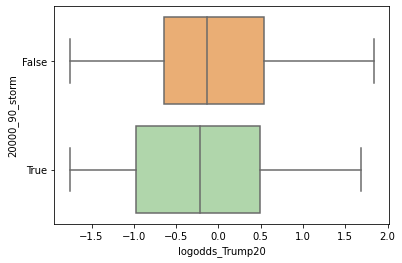

In [48]:
#at the local level, what are the politics of outelts participating in storms? 
sns.boxplot(x="logodds_Trump20", y=SCOL + "_storm", data=merged[merged["national"] == False], orient="h", palette=[F_COLOR, S_COLOR])

<Axes: xlabel='logodds_Trump20', ylabel='20000_90_storm'>

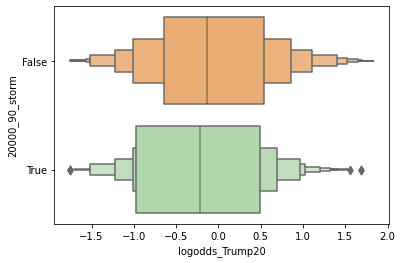

In [49]:
#at the local level, what are the politics of outelts participating in storms? 
sns.boxenplot(x="logodds_Trump20", y=SCOL + "_storm", data=merged[merged["national"] == False], orient="h", palette=[F_COLOR, S_COLOR])

In [51]:
merged["sqrt_pop"] = merged["total_population"].apply(np.sqrt)

Do outlets in more densely populated areas participate in more storms?  

<Axes: xlabel='total_population', ylabel='20000_90_storm'>

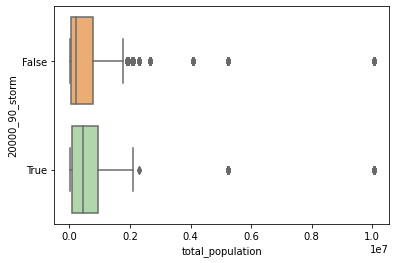

In [52]:
sns.boxplot(x="total_population", y=SCOL + "_storm", data=merged[merged["national"] == False], orient="h", palette=[F_COLOR, S_COLOR])

<Axes: xlabel='total_population', ylabel='20000_90_storm'>

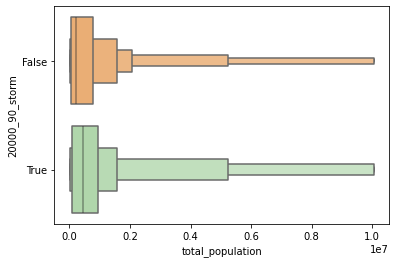

In [53]:
sns.boxenplot(x="total_population", y=SCOL + "_storm", data=merged[merged["national"] == False], orient="h", palette=[F_COLOR, S_COLOR])

<Axes: xlabel='rural_pct', ylabel='20000_90_storm'>

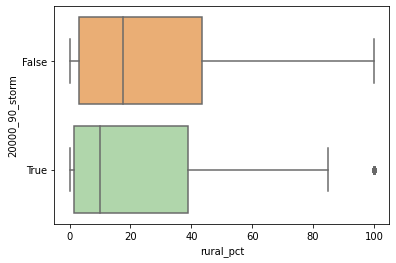

In [56]:
sns.boxplot(x="rural_pct", y=SCOL + "_storm", data=merged[merged["national"] == False], orient="h", palette=[F_COLOR, S_COLOR])

<Axes: xlabel='rural_pct', ylabel='20000_90_storm'>

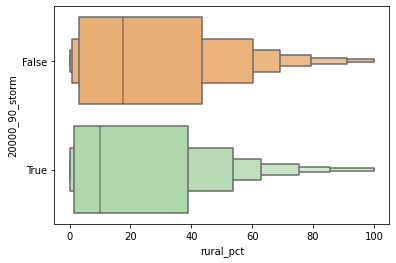

In [57]:
sns.boxenplot(x="rural_pct", y=SCOL + "_storm", data=merged[merged["national"] == False], orient="h", palette=[F_COLOR, S_COLOR])

Do outlets in more affluent areas participate in more storms?  

<Axes: xlabel='median_hh_inc', ylabel='20000_90_storm'>

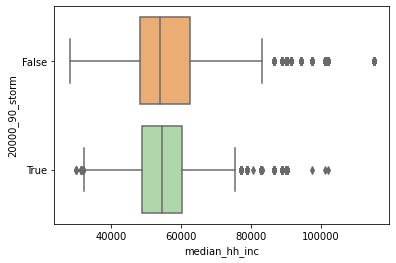

In [58]:
sns.boxplot(x="median_hh_inc", y=SCOL + "_storm", data=merged[merged["national"] == False], orient="h", palette=[F_COLOR, S_COLOR])

<Axes: xlabel='median_hh_inc', ylabel='20000_90_storm'>

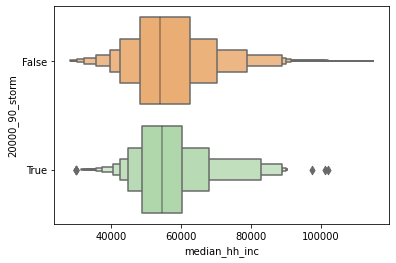

In [59]:
sns.boxenplot(x="median_hh_inc", y=SCOL + "_storm", data=merged[merged["national"] == False], orient="h", palette=[F_COLOR, S_COLOR])

In [60]:
stormNat = pd.DataFrame(merged.loc[merged[SCOL + "_storm"] == True, "national"].value_counts())
stormNat["storm"] = True

nonStormNat = pd.DataFrame(merged.loc[merged[SCOL + "_storm"] == False, "national"].value_counts())


In [61]:
stormNats = merged[[SCOL + "_storm", "national", "key"]].groupby([SCOL + "_storm", "national"]).agg(len).reset_index()
stormMarginals = merged[SCOL + "_storm"].value_counts().reset_index()
stormNats = pd.merge(stormNats, stormMarginals, on=SCOL + "_storm", how="left")
stormNats["normed"] = stormNats["key"] / stormNats["count"]

In [62]:
stormNats[SCOL + "_storm"] = stormNats[SCOL + "_storm"].astype(str)
stormNats["national"] = stormNats["national"].astype(str)

Text(0.5, 1.0, 'National vs. Local: Storms vs. Non-Storms')

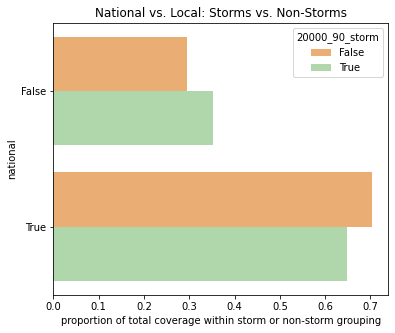

In [63]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x="normed", y="national", hue=SCOL + "_storm", data=stormNats, ax=ax, palette=[F_COLOR, S_COLOR])
ax.set_xlabel("proportion of total coverage within storm or non-storm grouping")
ax.set_title("National vs. Local: Storms vs. Non-Storms")

# TODO: adress how this has changed!
# Potential Write-up 
We find that media storm coverage tends to come from a slightly different subset of outlets than non-storm coverage. In terms of their coverage veracity, storms tend to include slightly more coverage from "reliable" sources than from "mixed" and "unreliable" news outelts. The balance of local and national coverage for storm versus non-storm stories is nearly identical, however. On the local level, storm coverage comes from outlets in more urban, liberal, and affluent counties when compared to non-storm coverage. 

In [64]:
#we note that the local outlets all have a 0 veracity label (reliable)
np.mean(merged.loc[merged["national"] == False, "verLab"].dropna())

0.0

In [65]:
def first(inList): 
    return list(inList)[0]

verPairs = merged.loc[merged["verLab"] >= 0, [SCOL, SCOL + "_storm", "verLab"]].dropna().groupby([SCOL]).agg({"verLab":list, SCOL + "_storm":first})

In [66]:
def uniqueVerLabs(inList): 
    unique = list(set(inList))
    
    outList = []
    for i in range(len(unique)): 
        for j in range(i, len(unique)): 
            outPair = [int(unique[i]), int(unique[j])]
            outPair.sort()
            outList.append(outPair)
    return outList

verPairs["pairs"] = verPairs["verLab"].apply(uniqueVerLabs)

In [67]:
verPairs = verPairs.drop(columns=["verLab"])

In [68]:
verPairs = verPairs.explode("pairs")

In [69]:
myMat = np.zeros((3, 3))

stormPairs = verPairs.loc[verPairs[SCOL + "_storm"] == True]
for i, row in stormPairs.iterrows(): 
    currPair = row["pairs"]
    myMat[int(currPair[0]), int(currPair[1])] = myMat[int(currPair[0]), int(currPair[1])] + 1

In [70]:
myMat

array([[91., 88., 90.],
       [ 0., 88., 88.],
       [ 0.,  0., 90.]])

In [71]:
#how mixed are the local and national clusters? 
natProps = merged[["national", SCOL, SCOL + "_storm"]].groupby(SCOL).agg({"national":np.mean, SCOL + "_storm":lambda x: list(x)[0]})

In [72]:
#most of the storms appear to be mixed with national and local coverage 

<Axes: xlabel='national', ylabel='Density'>

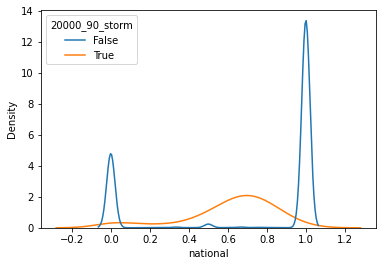

In [73]:
#try and filter out only the longer stories 
sns.kdeplot(x="national", hue=SCOL + "_storm", common_norm=False, data=natProps)

<Axes: xlabel='national', ylabel='Count'>

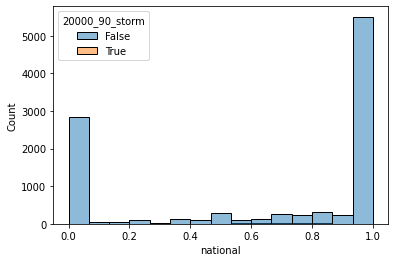

In [856]:
#how mixed are the local and national clusters? 
natProps = merged.loc[(merged["storyLen"] > 5),  ["national", SCOL, SCOL + "_storm"]].groupby(SCOL)\
.agg({"national":np.mean, SCOL + "_storm":lambda x: list(x)[0]})

#try and filter out only the longer stories 
sns.histplot(x="national", hue=SCOL + "_storm", common_norm=False, data=natProps)

In [78]:
#get the minimum story size 
min(merged.loc[merged[SCOL + "_storm"] == True].drop_duplicates(SCOL)["nArts"])

51

(array([ 0., 19., 28., 19., 14.,  2.,  4.,  4.,  1.,  1.,  2.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350.]),
 <BarContainer object of 27 artists>)

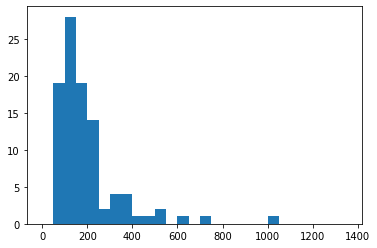

In [564]:
plt.hist(merged[merged[SCOL + "_storm"] == True].drop_duplicates(subset=[SCOL])["nArts"], bins=np.arange(0, 1400, 50))

In [ ]:
#storms don't neccisarily have to be large!

In [559]:
merged[(merged["nArts"] > 50) & (merged["storyLen"] > 5)].drop_duplicates(subset=[SCOL])[SCOL + "_storm"].value_counts()

20000_90_storm
True     16
False     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Storms versus comparable non-Storms: National-Local Mixture')

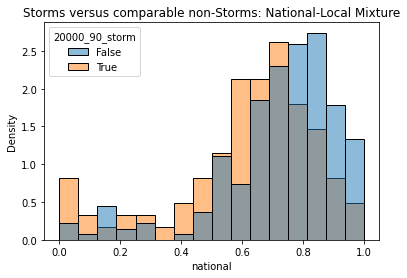

In [890]:
#how mixed are the local and national clusters? 
#NOTE: similar results with stories over size 70 
#as we go up in our cutoff, the density of local stories stays strong but we have less exclusively national stories 
#There is a concern that the exclusively local are false positives 
natProps = merged.loc[(merged["nArts"] > 50) & (merged["storyLen"] > 5) & (merged["storyLen"] <= 53), ["national", SCOL, SCOL + "_storm"]].groupby(SCOL)\
.agg({"national":np.mean, SCOL + "_storm":lambda x: list(x)[0]})

#try and filter out only the longer stories 
sns.histplot(x="national", hue=SCOL + "_storm", common_norm=False, data=natProps, stat="density")
plt.title("Storms versus comparable non-Storms: National-Local Mixture")

# Potential Write-up: 
We now turn to the multi-medianess of storms. While non-storm stories typically include coverage from exclusively national or local outlets, our media storms typically include a mix of both outlet types. While this is true across all non-storm coverage, it is also true when comparing media storms with non-storm stories of a similar duration and article count. This indicates that the type of stories that take over the coverage of outlets and become media storms are far more likely to be those with both local and national appeal. 

- we can also bring in work about agenda fragmentation (Gruszczynski, 2020) and show that agenda fragmentation (topic diversity) decreases when storms occur.  

In [86]:
#which outlets are the storm outlets 
patrollers = merged.loc[merged[SCOL + "_storm"] == True, [SCOL, SCOL + "_storm_source"]].drop_duplicates()

In [91]:
from ast import literal_eval

In [92]:
patrollers[SCOL + "_storm_source"] = patrollers[SCOL + "_storm_source"].apply(lambda x: literal_eval(x))
#.explode([SCOL + "_storm_source"])

In [100]:
patrolCounts = patrollers.explode([SCOL + "_storm_source"])[SCOL + "_storm_source"].value_counts()
patrolCounts = pd.DataFrame(patrolCounts).reset_index()

In [107]:
#note that the patrolling outlets aren't exclusively national at all! 
#hard to tell with other outlets, because they might just not report enough to 
#get over the "40 in one week" rule
#patrolCounts.tail(40)

In [167]:
merged.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'key', 'local_id', 'sourcedomain_id',
       'date', 'title', 'content', 'url', 'fips', 'source', 'description',
       'onlinesince', 'rank', 'state', 'city', 'lon', 'lat', 'county',
       'total_population', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc', 'predrt_0', 'predrt_12', 'predrt_3',
       'national', 'id', 'author', 'published', 'published_utc',
       'collection_utc', '20000_80', '20000_85', '20000_90', 'year', 'ver2020',
       'ver2021', 'logodds_Trump20', 'logodds_Trump16', 'logodds_Romney12',
       '20000_90_average_pct', '20000_90_num_over_cutoff',
       '20000_90_storm_source', '20000_90_storm', 'verLab', 'nArts',
       'storyLen', 'sqrt_pop'],
      dtype='object')

In [170]:
patrolRows = merged.loc[merged[SCOL + "_storm"] == True, [SCOL, SCOL + "_storm_source", "date", "key", "source", "national", "rural_pct", "verLab"]].drop_duplicates()

In [171]:
patrolRows[SCOL + "_storm_source"] = patrolRows[SCOL + "_storm_source"].apply(lambda x: literal_eval(x))

In [172]:
stormInfo = patrolRows[[SCOL, "date"]].groupby(SCOL).agg([min, max]).droplevel(0, axis=1)
stormInfo["lenDays"] = (stormInfo["max"] - stormInfo["min"]) / np.timedelta64(1, "D")
stormInfo = stormInfo.reset_index()

In [173]:
patrolRows = pd.merge(patrolRows, stormInfo, on=SCOL)

In [174]:
patrolRows["fNorm"] = (patrolRows["date"] - patrolRows["min"]) / np.timedelta64(1, "D")

In [175]:
def patrolled(inRow):
    return inRow["source"] in inRow[SCOL + "_storm_source"]

In [176]:
patrolRows["patrolled"] = patrolRows.apply(patrolled, axis=1)

<Axes: xlabel='fNorm', ylabel='Density'>

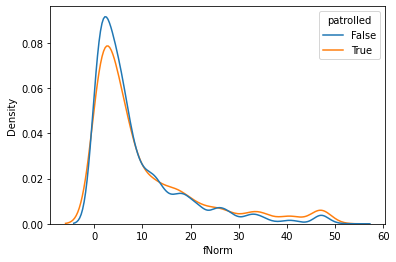

In [177]:
sns.kdeplot(x="fNorm", hue="patrolled", data=patrolRows, common_norm=False)

<Axes: xlabel='fNorm', ylabel='Density'>

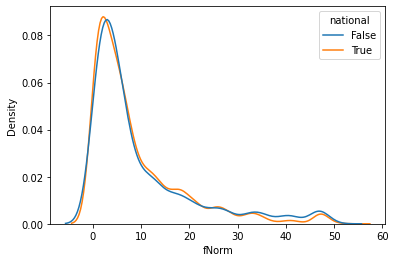

In [178]:
sns.kdeplot(x="fNorm", hue="national", data=patrolRows, common_norm=False)

<Axes: xlabel='fNorm', ylabel='Density'>

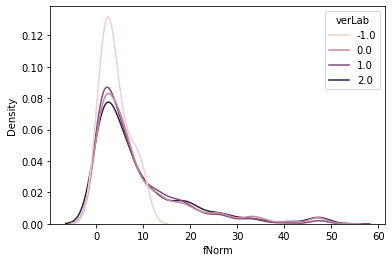

In [179]:
sns.kdeplot(x="fNorm", hue="verLab", data=patrolRows, common_norm=False)

In [181]:
#NOTE: but maybe there are still stories that migrate through the ecosystem? 

In [183]:
patrolRows["rural_pct"] = patrolRows["rural_pct"].astype(float)

<Axes: xlabel='fNorm', ylabel='rural_pct'>

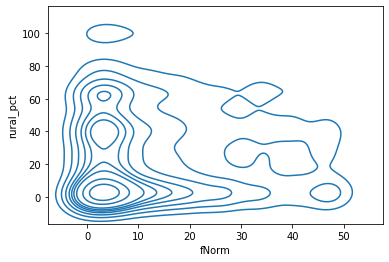

In [188]:
sns.kdeplot(x="fNorm", y="rural_pct", data=patrolRows)

In [257]:
patrolRows["starter"] = patrolRows["fNorm"] == 0 

In [265]:
#another thing to check is who reports on the first day of these stories? 
covChange = patrolRows[[SCOL, "national", "rural_pct", "starter", "verLab"]].groupby([SCOL, "starter"]).agg(np.nanmean)

In [266]:
covChange = covChange.reset_index().pivot(columns="starter", index=SCOL).droplevel(1, axis=1)

In [269]:
covChange.columns = ["national_start", "national_end", "rural_pct_start", "rural_pct_end", "ver_start", "ver_end"]

In [270]:
covChange["national_diff"] = covChange["national_start"] -  covChange["national_end"]
covChange["rural_pct_diff"] = covChange["rural_pct_start"] -  covChange["rural_pct_end"]
covChange["ver_diff"] = covChange["ver_start"] -  covChange["ver_end"]

(-1.0, 1.0)

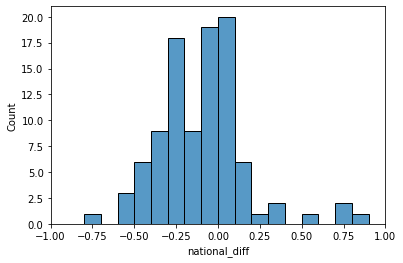

In [277]:
sns.histplot(x="national_diff", data=covChange, bins=np.arange(-1, 1, .1))
plt.xlim(-1, 1)

<Axes: xlabel='rural_pct_diff', ylabel='Count'>

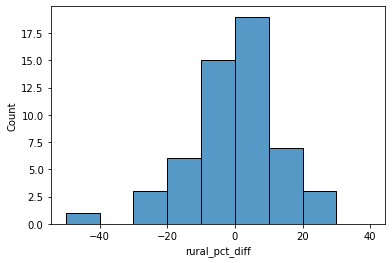

In [276]:
sns.histplot(x="rural_pct_diff", data=covChange, bins=np.arange(-50, 50, 10))


(-1.0, 1.0)

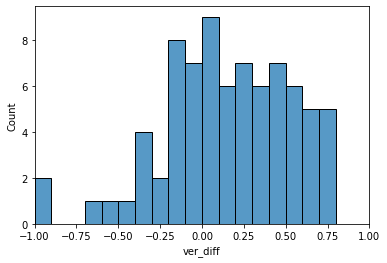

In [284]:
sns.histplot(x="ver_diff", data=covChange.dropna(subset=["ver_diff"]), bins=np.arange(-1, 1, .1))
plt.xlim(-1, 1)

In [282]:
np.nanmean(covChange["ver_diff"])

0.062240821511347105

In [304]:
import random
from tqdm import tqdm

In [338]:
#now, for each story, pick a row and find difference with the rest of rows on each of these variables 
#store the mean and variance of these samples 

meanNatDiffs = []
varNatDiffs = []
meanVerDiffs = []
varVerDiffs = []
for i in tqdm(range(200)): 
    natDiffs = []
    verDiffs = []
    for storm in patrolRows[SCOL].unique(): 
        currStorm = patrolRows[patrolRows[SCOL] == storm]
        sampDay = random.sample(list(currStorm["date"]), 1)[0]

        sampRows = currStorm[currStorm["date"] == sampDay]
        nonSampRows = currStorm[currStorm["date"] != sampDay]

        natDiff = np.mean(sampRows["national"]) - np.mean(nonSampRows["national"])
        natDiffs.append(natDiff)
        
        verDiff = np.nanmean(sampRows["verLab"]) - np.nanmean(nonSampRows["verLab"])
        verDiffs.append(verDiff)
        
    meanNatDiffs.append(np.mean(natDiffs))
    varNatDiffs.append(np.var(natDiffs))
    
    meanVerDiffs.append(np.nanmean(verDiffs))
    varVerDiffs.append(np.nanvar(verDiffs))

  0%|          | 0/200 [00:00<?, ?it/s]<ipython-input-338-4297fb5915d9>:21: RuntimeWarning: Mean of empty slice
  verDiff = np.nanmean(sampRows["verLab"]) - np.nanmean(nonSampRows["verLab"])
100%|██████████| 200/200 [01:27<00:00,  2.29it/s]


Text(0, 0.5, 'count')

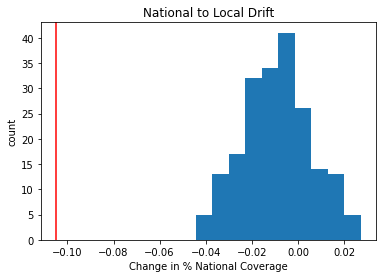

In [319]:
plt.hist(meanNatDiffs)
plt.title("National to Local Drift")
plt.axvline(np.mean(covChange["national_diff"]), color="red")
plt.xlabel("Average Change in % National Coverage")
plt.ylabel("count")

Text(0, 0.5, 'count')

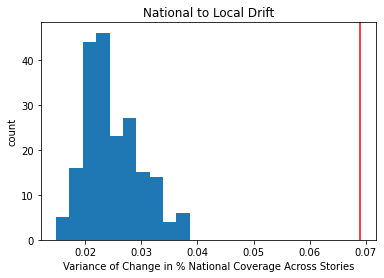

In [321]:
plt.hist(varNatDiffs)
plt.title("National to Local Drift")
plt.axvline(np.var(covChange["national_diff"]), color="red")
plt.xlabel("Variance of Change in % National Coverage Across Stories")
plt.ylabel("count")

# Interpretation
On average, our identified media storms have day 1 coverage that is 10% more national than the remaining days. 
We also find evidence of heterogeneity of media storm evolution between day 1 and remaining days. In other words, while drift from national to local is more common, we see a wider variety of drift patterns than would be expected by random chance. 


Text(0, 0.5, 'count')

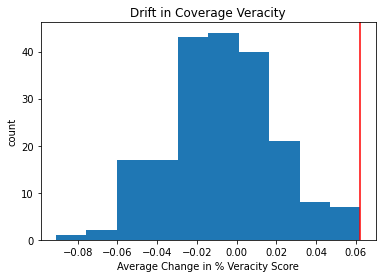

In [341]:
plt.hist(meanVerDiffs)
plt.title("Drift in Coverage Veracity")
plt.axvline(np.mean(covChange["ver_diff"]), color="red")
plt.xlabel("Average Change in % Veracity Score")
plt.ylabel("count")

Text(0, 0.5, 'count')

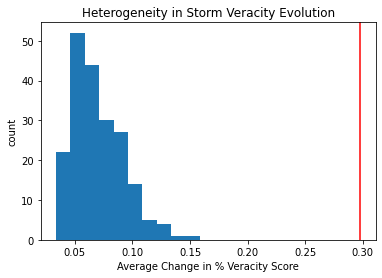

In [342]:
plt.hist(varVerDiffs)
plt.title("Heterogeneity in Storm Veracity Evolution")
plt.axvline(np.nanvar(covChange["ver_diff"]), color="red")
plt.xlabel("Average Change in % Veracity Score")
plt.ylabel("count")

# Interpretation
On average, our identified media storms have day 1 coverage that is 6% less reliable than the remaining days. 
We also find evidence of heterogeneity of media storm's veracity evolution between day 1 and remaining days. In other words, while drift from more reliable to less reliable is more common, we see a wider variety of drift patterns than would be expected by random chance. 


array([[1.        , 0.03241826],
       [0.03241826, 1.        ]])

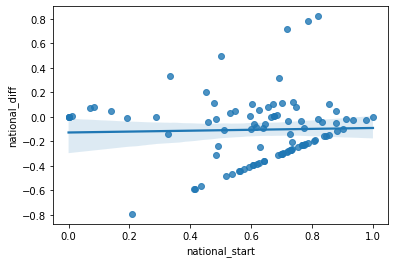

In [357]:
#check if coverage that starts national tends to go local 
sns.regplot(x="national_start", y="national_diff", data=covChange)

np.corrcoef(x=covChange["national_start"], y=covChange["national_diff"])

In [475]:
#bins give us our starting value
STEP = .2
bins = np.arange(0, 1 + STEP, STEP)

outList = []
for lBin in bins: 
    outList.append(np.mean(covChange.loc[(covChange["national_start"] >= lBin) & (covChange["national_start"] <= lBin + STEP), "national_diff"]))


Text(0, 0.5, 'drift from local to national')

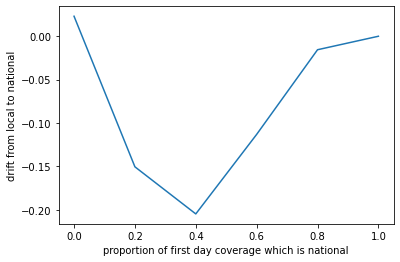

In [476]:
sns.lineplot(x=np.arange(0, 1 + STEP, STEP), y=outList)
plt.xlabel("proportion of first day coverage which is national")
plt.ylabel("drift from local to national")

In [682]:
covChange["natStartBins"] = pd.cut(covChange["national_start"], bins=bins, right=True)
covChange["ruralStartBins"] = pd.cut(covChange["rural_pct_start"], np.arange(0, 70 + 14, 14))
covChange["verStartBins"] = pd.cut(covChange["ver_start"], np.arange(0, 1.2 + .3, .3))

#covChange["natStartBins"] = pd.qcut(covChange["national_start"], 5)
#covChange["ruralStartBins"] = pd.qcut(covChange["rural_pct_start"], 5)
#covChange["verStartBins"] = pd.qcut(covChange["ver_start"], 5)


<Axes: xlabel='national_diff', ylabel='natStartBins'>

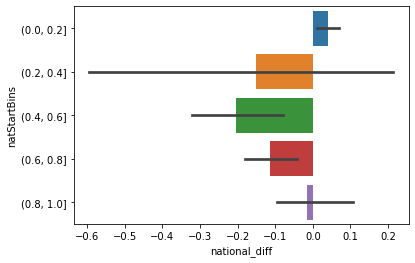

In [683]:

sns.barplot(data=covChange,x="national_diff", y="natStartBins", )

In [684]:
min(covChange["ver_start"])

0.0

In [685]:
df1 = covChange[["national_start", "natStartBins", "rural_pct_start", "ruralStartBins", "ver_start", "verStartBins"]].reset_index()\
.rename(columns={"national_start":"natProp", "rural_pct_start":"ruralProp", "ver_start":"verProp"})
df1["time"] = 0

df2 = covChange[["national_end", "natStartBins","rural_pct_end", "ruralStartBins", "ver_end", "verStartBins"]].reset_index()\
.rename(columns={"national_end":"natProp", "rural_pct_end":"ruralProp", "ver_end":"verProp"})
df2["time"] = 1

newDf = pd.concat([df1, df2]).sort_index()

Text(0.5, 1.0, 'The Effect of First Day Coverage on Story Trajectory')

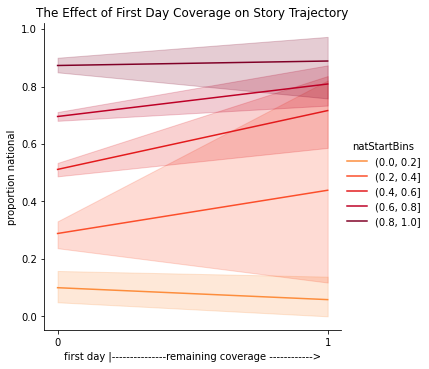

In [696]:
sns.relplot(data=newDf, x="time", y="natProp",  hue="natStartBins", kind="line", palette=['#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026'])
#sns.lineplot(data=newDf, x="time", y="natProp", hue="natStartBins", palette=['#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026'], units=SCOL, estimator=None, alpha=.2, legend=False)
plt.xlabel("first day |---------------remaining coverage ------------>")
plt.ylabel("proportion national")
plt.xticks([0,1])
plt.title("The Effect of First Day Coverage on Story Trajectory")

In [697]:
newDf.loc[newDf[""]]

,20000_90,natProp,natStartBins,ruralProp,ruralStartBins,verProp,verStartBins,time,unit
0,359,0.492537,"(0.4, 0.6]",18.581800,"(14, 28]",0.580645,"(0.3, 0.6]",0,0
0,359,0.730769,"(0.4, 0.6]",8.975072,"(14, 28]",0.611111,"(0.3, 0.6]",1,1
1,533,0.738636,"(0.6, 0.8]",17.373445,"(14, 28]",0.697391,"(0.6, 0.9]",0,2
1,533,0.616438,"(0.6, 0.8]",17.080522,"(14, 28]",0.494505,"(0.6, 0.9]",1,3
2,608,0.458503,"(0.4, 0.6]",22.298115,"(14, 28]",0.642140,"(0.6, 0.9]",0,4
...,...,...,...,...,...,...,...,...,...
95,234960,0.071429,"(0.0, 0.2]",1.514781,"(0, 14]",NaN,NaN,0,191
96,236431,0.000000,NaN,42.427387,"(42, 56]",NaN,NaN,1,192
96,236431,0.000000,NaN,42.836071,"(42, 56]",NaN,NaN,0,193
97,295028,0.192982,"(0.0, 0.2]",23.016636,"(14, 28]",NaN,NaN,0,194


In [687]:
newDf["unit"] = list(range(0, len(newDf)))

In [688]:
newDf["unit"] = newDf["unit"].astype(str)

In [689]:
newDf

,20000_90,natProp,natStartBins,ruralProp,ruralStartBins,verProp,verStartBins,time,unit
0,359,0.492537,"(0.4, 0.6]",18.581800,"(14, 28]",0.580645,"(0.3, 0.6]",0,0
0,359,0.730769,"(0.4, 0.6]",8.975072,"(14, 28]",0.611111,"(0.3, 0.6]",1,1
1,533,0.738636,"(0.6, 0.8]",17.373445,"(14, 28]",0.697391,"(0.6, 0.9]",0,2
1,533,0.616438,"(0.6, 0.8]",17.080522,"(14, 28]",0.494505,"(0.6, 0.9]",1,3
2,608,0.458503,"(0.4, 0.6]",22.298115,"(14, 28]",0.642140,"(0.6, 0.9]",0,4
...,...,...,...,...,...,...,...,...,...
95,234960,0.071429,"(0.0, 0.2]",1.514781,"(0, 14]",NaN,NaN,0,191
96,236431,0.000000,NaN,42.427387,"(42, 56]",NaN,NaN,1,192
96,236431,0.000000,NaN,42.836071,"(42, 56]",NaN,NaN,0,193
97,295028,0.192982,"(0.0, 0.2]",23.016636,"(14, 28]",NaN,NaN,0,194


<ipython-input-690-17c7a8dd2092>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=newDf.reset_index(), x="time", y="ruralProp", kind="line", palette=['#014636'])


Text(0.5, 1.0, '')

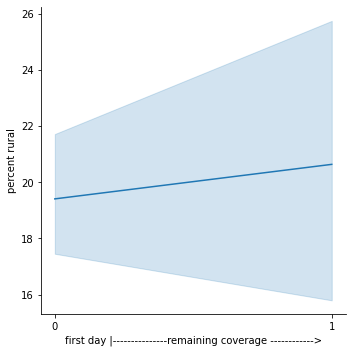

In [690]:
#sns.relplot(data=newDf, x="time", y="ruralProp",  hue="ruralStartBins", kind="line", palette=['#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026'])
sns.relplot(data=newDf.reset_index(), x="time", y="ruralProp", kind="line", palette=['#014636'])

plt.xlabel("first day |---------------remaining coverage ------------>")
plt.ylabel("percent rural")
plt.xticks([0,1])

plt.title("")

Text(0.5, 1.0, '')

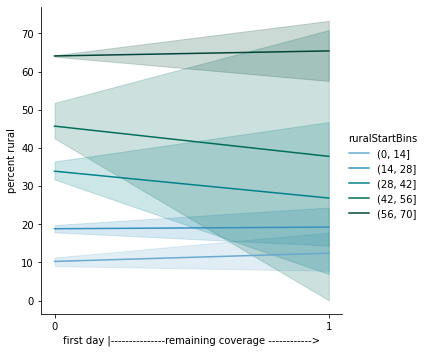

In [691]:
#sns.relplot(data=newDf, x="time", y="ruralProp",  hue="ruralStartBins", kind="line", palette=['#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026'])
sns.relplot(data=newDf.reset_index(), x="time", y="ruralProp", hue="ruralStartBins", kind="line", palette=['#67a9cf','#3690c0','#02818a','#016c59','#014636'])

plt.xlabel("first day |---------------remaining coverage ------------>")
plt.ylabel("percent rural")
plt.xticks([0,1])

plt.title("")

In [692]:
#idea: try this with the last three days rather than all remaining coverage? 

<ipython-input-693-97b93b9ccab6>:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.relplot(data=newDf.reset_index(), x="time", y="verProp", hue="verStartBins", kind="line", palette=['#67a9cf','#3690c0','#02818a','#016c59','#014636'])


([<matplotlib.axis.XTick at 0x7fe1d9e357c0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

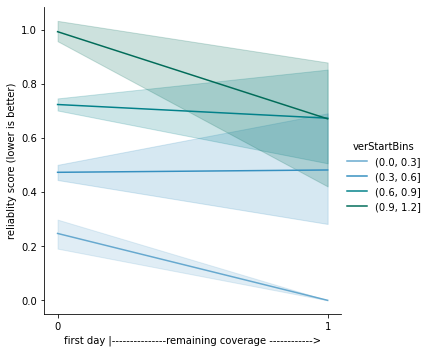

In [693]:
#sns.relplot(data=newDf, x="time", y="ruralProp",  hue="ruralStartBins", kind="line", palette=['#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026'])
sns.relplot(data=newDf.reset_index(), x="time", y="verProp", hue="verStartBins", kind="line", palette=['#67a9cf','#3690c0','#02818a','#016c59','#014636'])

plt.xlabel("first day |---------------remaining coverage ------------>")
plt.ylabel("reliablity score (lower is better)")
plt.xticks([0,1])

#coverage tends to get more reliable 

In [694]:
covChange["ruralStartBins"].value_counts()

ruralStartBins
(14, 28]    51
(0, 14]     31
(28, 42]    10
(42, 56]     3
(56, 70]     2
Name: count, dtype: int64

In [695]:
#TODO: make same versions but with percentile cutoffs 

In [618]:
#can we track the entire lives of our storms in a nice way? 
stormSeries = merged.loc[merged[SCOL + "_storm"] == True, ["date", SCOL, "key", "national"]]
fDays = stormSeries[["date", SCOL]].groupby(SCOL).agg([min, max]).reset_index().droplevel(1, 1)
fDays.columns = [SCOL, "fDay", "lDay"] #.rename(columns={"date":"firstDay"})

In [619]:
stormSeries = pd.merge(fDays, stormSeries, on=SCOL)

stormSeries["fNorm"] = (stormSeries["date"] - stormSeries["fDay"]) / np.timedelta64(1, "D")
#stormSeries["lNorm"] = (stormSeries["date"] - stormSeries["lDay"]) / np.timedelta64(1, "D")

stormSeries["propNorm"] = stormSeries["fNorm"] / ((stormSeries["lDay"] - stormSeries["fDay"]) / np.timedelta64(1, "D"))

In [620]:
stormSeries

,20000_90,fDay,lDay,date,key,national,fNorm,propNorm
0,359,2020-07-07,2020-07-13,2020-07-07,2578047,True,0.0,0.000000
1,359,2020-07-07,2020-07-13,2020-07-07,2858153,True,0.0,0.000000
2,359,2020-07-07,2020-07-13,2020-07-07,3157398,True,0.0,0.000000
3,359,2020-07-07,2020-07-13,2020-07-07,2890987,True,0.0,0.000000
4,359,2020-07-07,2020-07-13,2020-07-07,2532064,True,0.0,0.000000
...,...,...,...,...,...,...,...,...
20401,295028,2021-12-05,2021-12-23,2021-12-22,1202929,False,17.0,0.944444
20402,295028,2021-12-05,2021-12-23,2021-12-22,3936735,True,17.0,0.944444
20403,295028,2021-12-05,2021-12-23,2021-12-22,1202374,False,17.0,0.944444
20404,295028,2021-12-05,2021-12-23,2021-12-22,1202340,False,17.0,0.944444


In [621]:
stormSeries

,20000_90,fDay,lDay,date,key,national,fNorm,propNorm
0,359,2020-07-07,2020-07-13,2020-07-07,2578047,True,0.0,0.000000
1,359,2020-07-07,2020-07-13,2020-07-07,2858153,True,0.0,0.000000
2,359,2020-07-07,2020-07-13,2020-07-07,3157398,True,0.0,0.000000
3,359,2020-07-07,2020-07-13,2020-07-07,2890987,True,0.0,0.000000
4,359,2020-07-07,2020-07-13,2020-07-07,2532064,True,0.0,0.000000
...,...,...,...,...,...,...,...,...
20401,295028,2021-12-05,2021-12-23,2021-12-22,1202929,False,17.0,0.944444
20402,295028,2021-12-05,2021-12-23,2021-12-22,3936735,True,17.0,0.944444
20403,295028,2021-12-05,2021-12-23,2021-12-22,1202374,False,17.0,0.944444
20404,295028,2021-12-05,2021-12-23,2021-12-22,1202340,False,17.0,0.944444


<Axes: xlabel='propNorm', ylabel='national'>

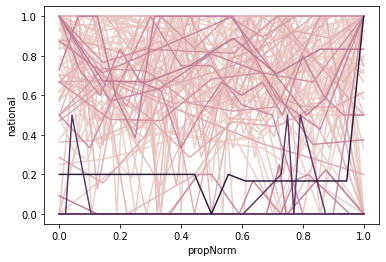

In [626]:
natSeries = stormSeries[[SCOL, "propNorm", "national"]].groupby([SCOL, "propNorm"]).agg(np.mean).reset_index()
sns.lineplot(data=natSeries, x="propNorm", y = "national", hue=SCOL, legend=False)

In [663]:
#fDay versus last day? 
#first 3 versus last 3 
merged

,Unnamed: 0.2,Unnamed: 0.1,key,local_id,sourcedomain_id,date,title,content,url,fips,...,logodds_Trump16,logodds_Romney12,20000_90_average_pct,20000_90_num_over_cutoff,20000_90_storm_source,20000_90_storm,verLab,nArts,storyLen,sqrt_pop
0,0,2428066,2428066,NaN,NaN,2020-01-01,Five new 2020 coins revealed including VE Day ...,TEAM GB and the 75th anniversary of VE Day are...,https://www.thesun.co.uk/money/10647576/new-20...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,2.0,1,0.0,NaN
1,1,2283486,2283486,NaN,NaN,2020-01-01,20 YEARS: A SYNDICATION ANNIVERSARY REFLECTION,The close of 2019 marks two full decades since...,http://michellemalkin.com/2019/12/31/20-years-...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,1,0.0,NaN
2,2,1543217,1543217,NaN,NaN,2020-01-01,French chef loses MICHELIN suit over star demo...,"The showman chef , known as much for his ubiqu...",http://feedproxy.google.com/~r/DrudgeReportFee...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,1,0.0,NaN
3,3,1543216,1543216,NaN,NaN,2020-01-01,Hunt for 'insane' simian who attacked hundred ...,A wild monkey is bringing terror to an Indian ...,http://feedproxy.google.com/~r/DrudgeReportFee...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,1,0.0,NaN
4,4,1543215,1543215,NaN,NaN,2020-01-01,"Furry, cute, drooling herpes: What to do with ...",Visitors to Florida ’ s picturesque Silver Spr...,http://feedproxy.google.com/~r/DrudgeReportFee...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582893,4567463,3804678,3804678,NaN,NaN,2021-12-31,Reports: Colorado Wildfires Are Most Destructi...,Colorado ’ s wildfires are shaping up to be th...,https://www.breitbart.com/weather/2021/12/31/r...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1.0,1,0.0,NaN
4582894,4567464,3804677,3804677,NaN,NaN,2021-12-31,"Police: Disabled Man, Caregivers Zip-Tied amid...","A disabled man , his child , and the people ca...",https://www.breitbart.com/crime/2021/12/31/pol...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1.0,1,0.0,NaN
4582895,4567465,3804676,3804676,NaN,NaN,2021-12-31,"Joe Biden, with Help from GOP, Resettles Over ...",President Joe Biden has resettled more than 52...,https://www.breitbart.com/podcast/2021/12/31/j...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1.0,1,0.0,NaN
4582896,4567466,3925800,3925800,NaN,NaN,2021-12-31,Ghislaine Maxwell’s Conviction Is Welcome But ...,Ghislaine Maxwell ’ s Conviction Is Welcome Bu...,https://thewashingtonstandard.com/ghislaine-ma...,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1.0,3,0.0,NaN
